In [1]:
!pip install pm4py
!pip install ocpa

In [43]:
import ocpa
from statistics import mean
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory


def calculate_ocel_simplicity(ocpn, object_types, k=1.5):
    """
    Calculate the simplicity of an object-centric Petri net (OCPN).

    Parameters:
    -----------
    ocpn : ObjectCentricPetriNet
        The object-centric Petri net discovered from OCEL.
    object_types : List[str]
        The list of object types in the OCEL.
    k : float
        Baseline complexity constant. Default is 2.0.

    Returns:
    --------
    overall_simplicity : float
        The simplicity of the object-centric Petri net.
    """
    arc_degrees_by_type = {obj_type: [] for obj_type in object_types}

    # Analyze places
    for place in ocpn.places:
        # Infer the object type from the place name (assuming convention-based naming)
        for obj_type in object_types:
            if obj_type in place.name:
                in_degree = len(place.in_arcs)
                out_degree = len(place.out_arcs)
                arc_degrees_by_type[obj_type].append(in_degree + out_degree)

    # Analyze transitions
    for transition in ocpn.transitions:
        # Infer the object type from the transition name (assuming convention-based naming)
        for obj_type in object_types:
            if obj_type in transition.name:
                in_degree = len(transition.in_arcs)
                out_degree = len(transition.out_arcs)
                arc_degrees_by_type[obj_type].append(in_degree + out_degree)

    # Compute mean arc degree for each object type
    mean_degrees_by_type = {
        obj_type: mean(arc_degrees) if arc_degrees else 0.0
        for obj_type, arc_degrees in arc_degrees_by_type.items()
    }

    # Compute simplicity for each object type
    simplicity_by_type = {
        obj_type: 1.0 / (1.0 + max(mean_degree - k, 0))
        for obj_type, mean_degree in mean_degrees_by_type.items()
    }

    # Calculate overall simplicity as the average simplicity across all object types
    overall_simplicity = mean(simplicity_by_type.values())
    return overall_simplicity




material getting log
[{'attributes': {'concept:name': 'material:1'}, 'events': [{'event_lifecycle': 'complete', 'time:timestamp': Timestamp('2022-04-01 15:11:00+0200', tz='UTC+02:00'), 'event_id': 0, 'event_resource': 'Manufacturing Department', 'concept:name': 'Create Purchase Requisition', 'event_start_timestamp': Timestamp('2022-04-01 15:11:00+0200', tz='UTC+02:00')}, '..', {'event_lifecycle': 'complete', 'time:timestamp': Timestamp('2022-04-02 02:51:00+0200', tz='UTC+02:00'), 'event_id': 1, 'event_resource': 'Procurement Department Manager', 'concept:name': 'Approve Purchase Requisition', 'event_start_timestamp': Timestamp('2022-04-02 02:51:00+0200', tz='UTC+02:00')}]}, '....', {'attributes': {'concept:name': 'material:1305'}, 'events': [{'event_lifecycle': 'complete', 'time:timestamp': Timestamp('2023-09-01 17:35:00+0200', tz='UTC+02:00'), 'event_id': 8027, 'event_resource': 'Manufacturing Department', 'concept:name': 'Create Purchase Requisition', 'event_start_timestamp': Timesta

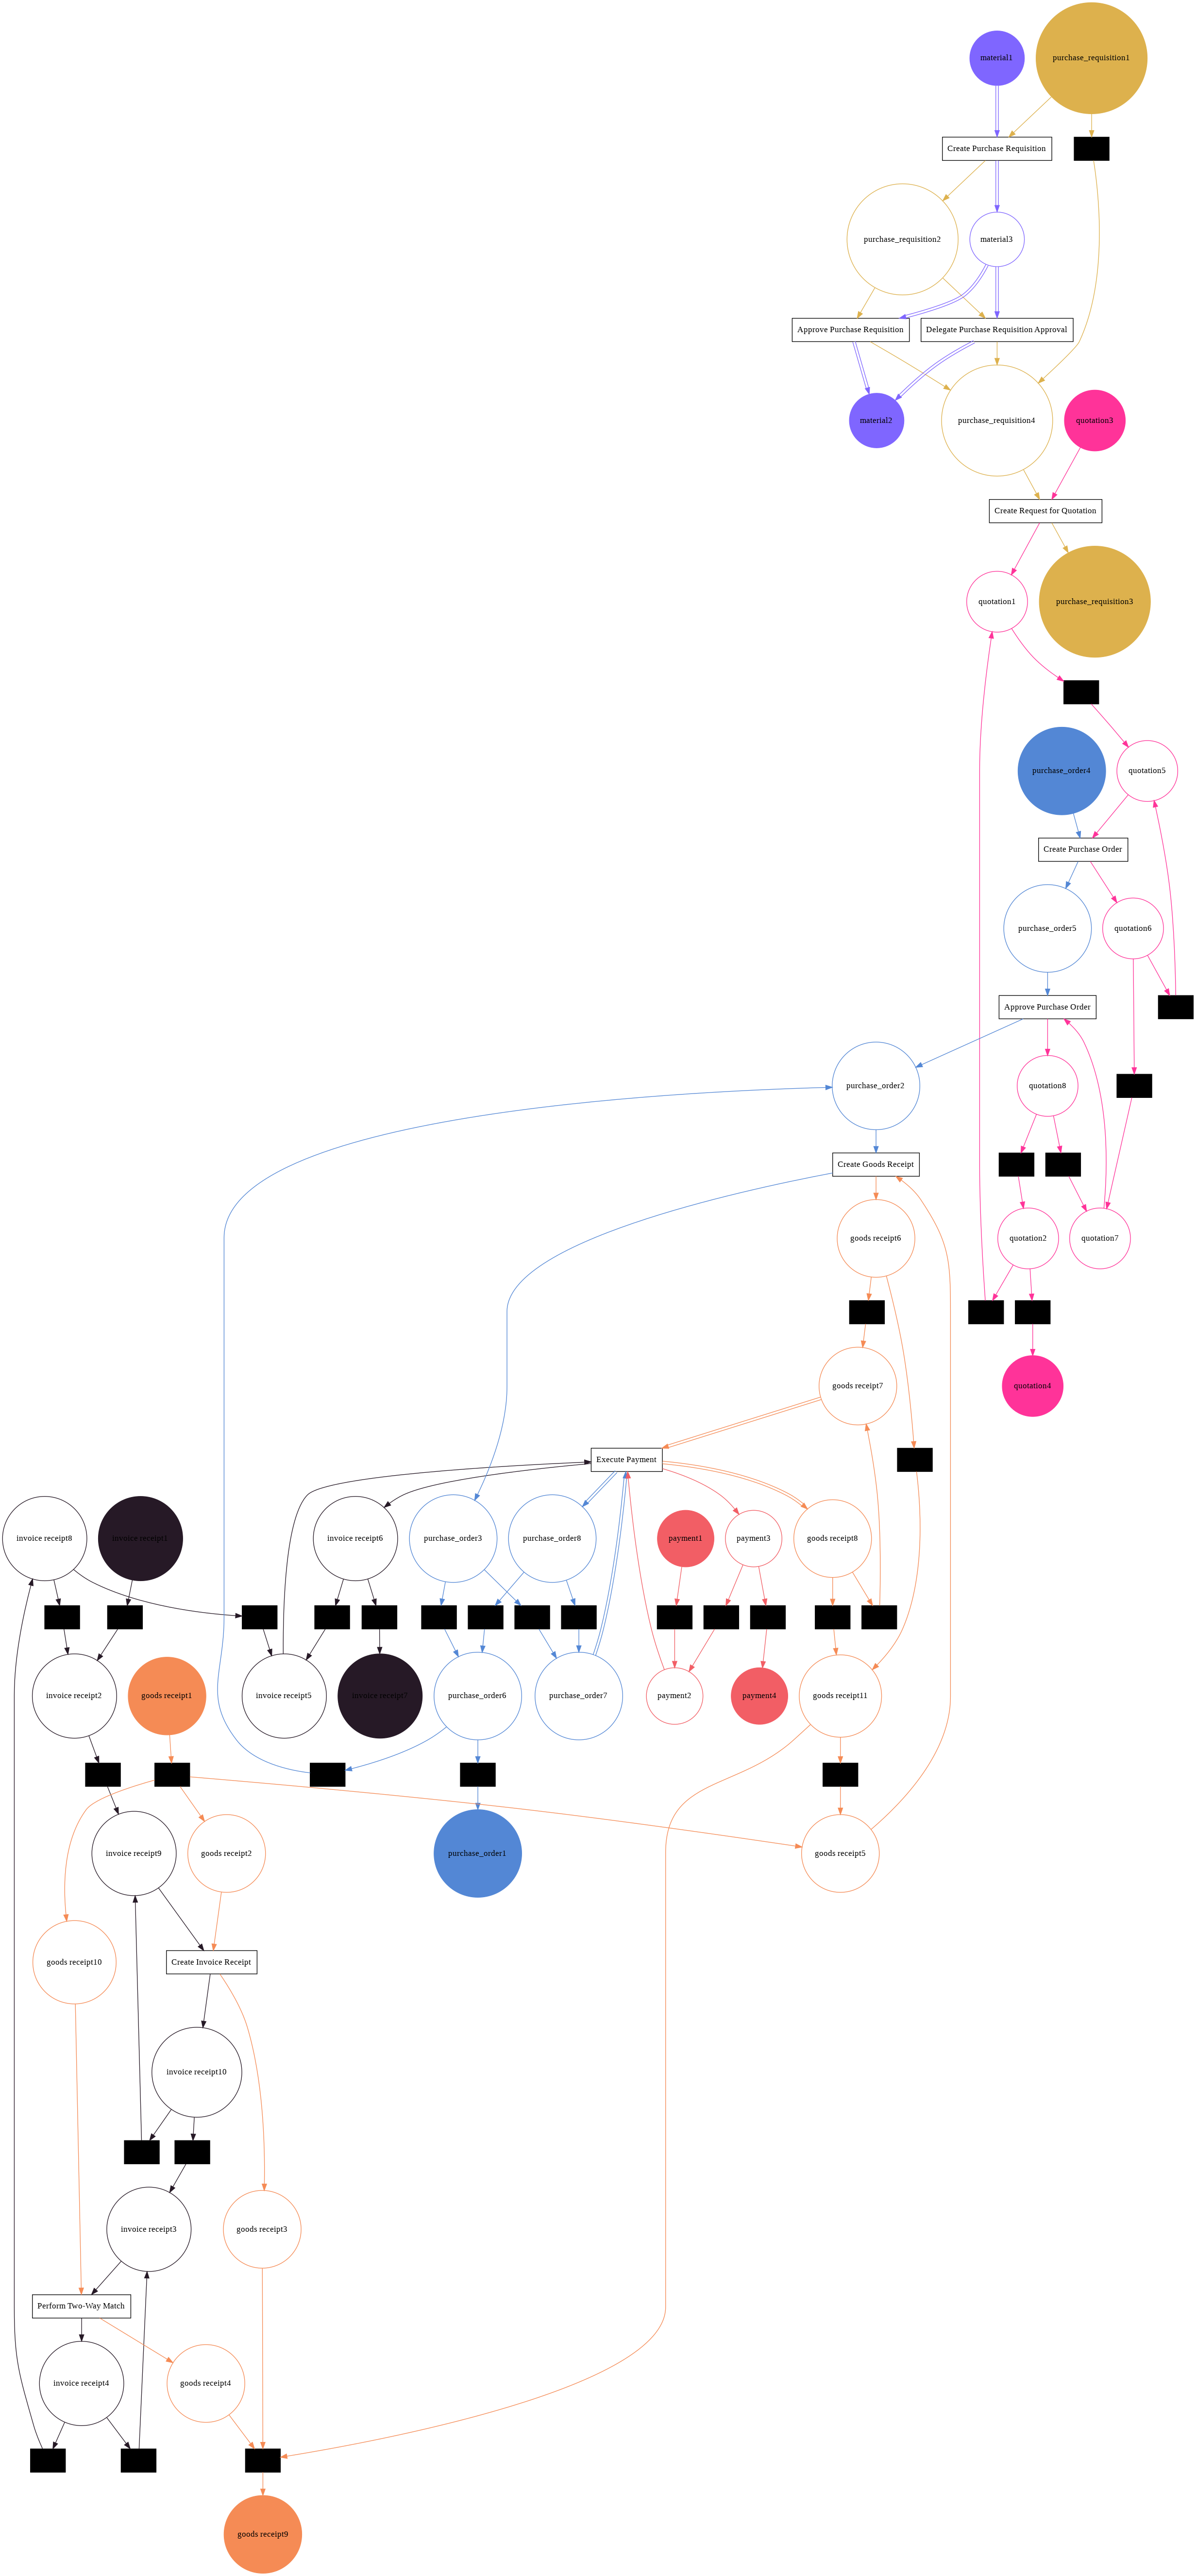

In [36]:
import ocpa
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
from PIL import Image

filename = "/content/p2p-2023.jsonocel"
ocel_p2p_2023 = ocel_import_factory.apply(filename)
ocpn_p2p_2023 = ocpn_discovery_factory.apply(ocel_p2p_2023)
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn_p2p_2023), "oc_p2p_2023_petri_net.png")
im_p2p_2023 = Image.open(r"oc_p2p_2023_petri_net.png")
im_p2p_2023

In [39]:
# Get object types from OCEL
object_types = list(ocel_p2p_2023.object_types)  # Extract object types

# Calculate simplicity of the discovered Petri net
simplicity = calculate_ocel_simplicity(ocpn_p2p_2023, object_types)
print(f"Overall Simplicity of the Petri Net: {simplicity:.4f}")

Overall Simplicity of the Petri Net: 0.5494


PURCHREQ getting log
[{'attributes': {'concept:name': 'PURCHREQ0'}, 'events': [{'time:timestamp': Timestamp('2021-03-01 09:00:00+0100', tz='UTC+01:00'), 'event_id': 0, 'concept:name': 'Create Purchase Requisition', 'event_start_timestamp': Timestamp('2021-03-01 09:00:00+0100', tz='UTC+01:00')}, '..', {'time:timestamp': Timestamp('2021-03-04 09:00:00+0100', tz='UTC+01:00'), 'event_id': 1, 'concept:name': 'Create Purchase Order', 'event_start_timestamp': Timestamp('2021-03-04 09:00:00+0100', tz='UTC+01:00')}]}, '....', {'attributes': {'concept:name': 'PURCHREQ79'}, 'events': [{'time:timestamp': Timestamp('2021-07-15 09:00:00+0100', tz='UTC+01:00'), 'event_id': 711, 'concept:name': 'Create Purchase Requisition', 'event_start_timestamp': Timestamp('2021-07-15 09:00:00+0100', tz='UTC+01:00')}, '..', {'time:timestamp': Timestamp('2021-07-19 09:00:00+0100', tz='UTC+01:00'), 'event_id': 712, 'concept:name': 'Create Purchase Order', 'event_start_timestamp': Timestamp('2021-07-19 09:00:00+0100',

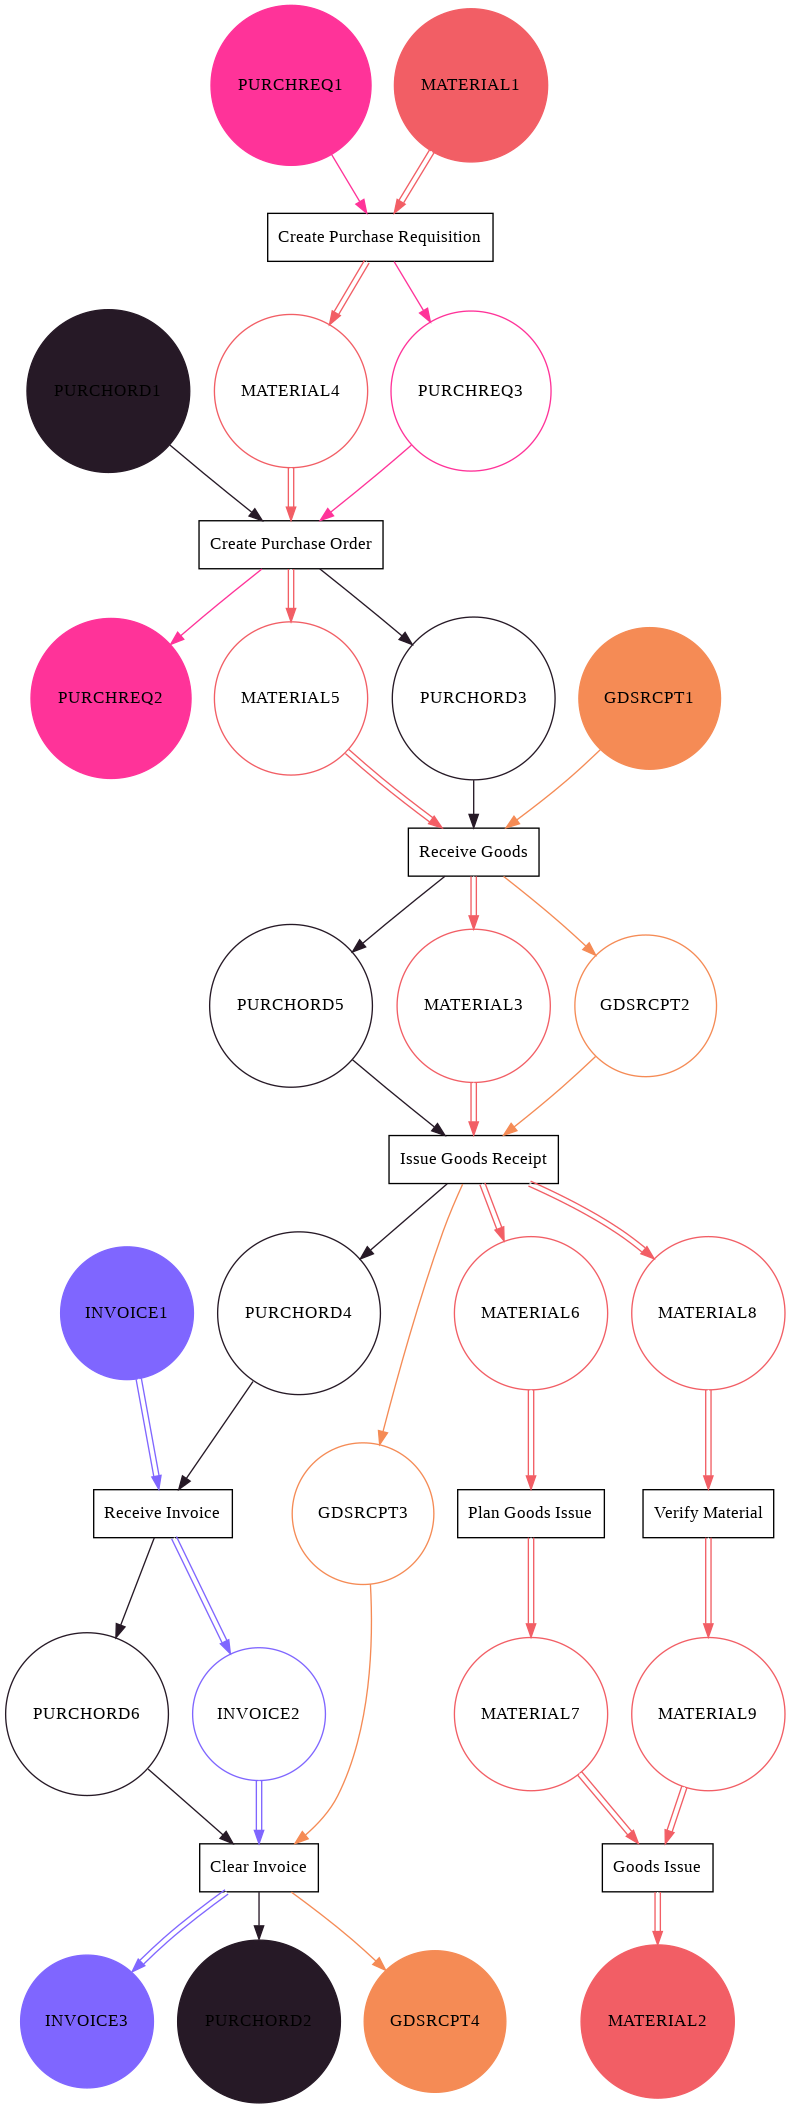

In [37]:
filename = "/content/p2p-normal.jsonocel"
ocel_p2p_normal = ocel_import_factory.apply(filename)
ocpn_p2p_normal = ocpn_discovery_factory.apply(ocel_p2p_normal)
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn_p2p_normal), "oc_p2p_normal_petri_net.png")
im_p2p_normal = Image.open(r"oc_p2p_normal_petri_net.png")
im_p2p_normal

In [42]:
# Get object types from OCEL
object_types = list(ocel_p2p_normal.object_types)  # Extract object types

# Calculate simplicity of the discovered Petri net
simplicity = calculate_ocel_simplicity(ocpn_p2p_normal, object_types)
print(f"Overall Simplicity of the Petri Net: {simplicity:.4f}")

Overall Simplicity of the Petri Net: 0.9280


order getting log
[{'attributes': {'concept:name': 'order1'}, 'events': [{'time:timestamp': Timestamp('2022-10-20 16:56:19.864004'), 'event_id': 0, 'concept:name': 'Place Order', 'event_start_timestamp': Timestamp('2022-10-20 16:56:19.864004')}, '..', {'time:timestamp': Timestamp('2022-10-20 17:01:51.864004'), 'event_id': 4, 'concept:name': 'Pay Order', 'event_start_timestamp': Timestamp('2022-10-20 17:01:51.864004')}]}, '....', {'attributes': {'concept:name': 'order199'}, 'events': [{'time:timestamp': Timestamp('2022-10-22 01:54:12.868991'), 'event_id': 1300, 'concept:name': 'Place Order', 'event_start_timestamp': Timestamp('2022-10-22 01:54:12.868991')}, '..', {'time:timestamp': Timestamp('2022-10-24 03:52:39.869990'), 'event_id': 1711, 'concept:name': 'Pay Order', 'event_start_timestamp': Timestamp('2022-10-24 03:52:39.869990')}]}]
199
199
order got log
199
order discovered net
item getting log
[{'attributes': {'concept:name': 'item3'}, 'events': [{'time:timestamp': Timestamp('2022-

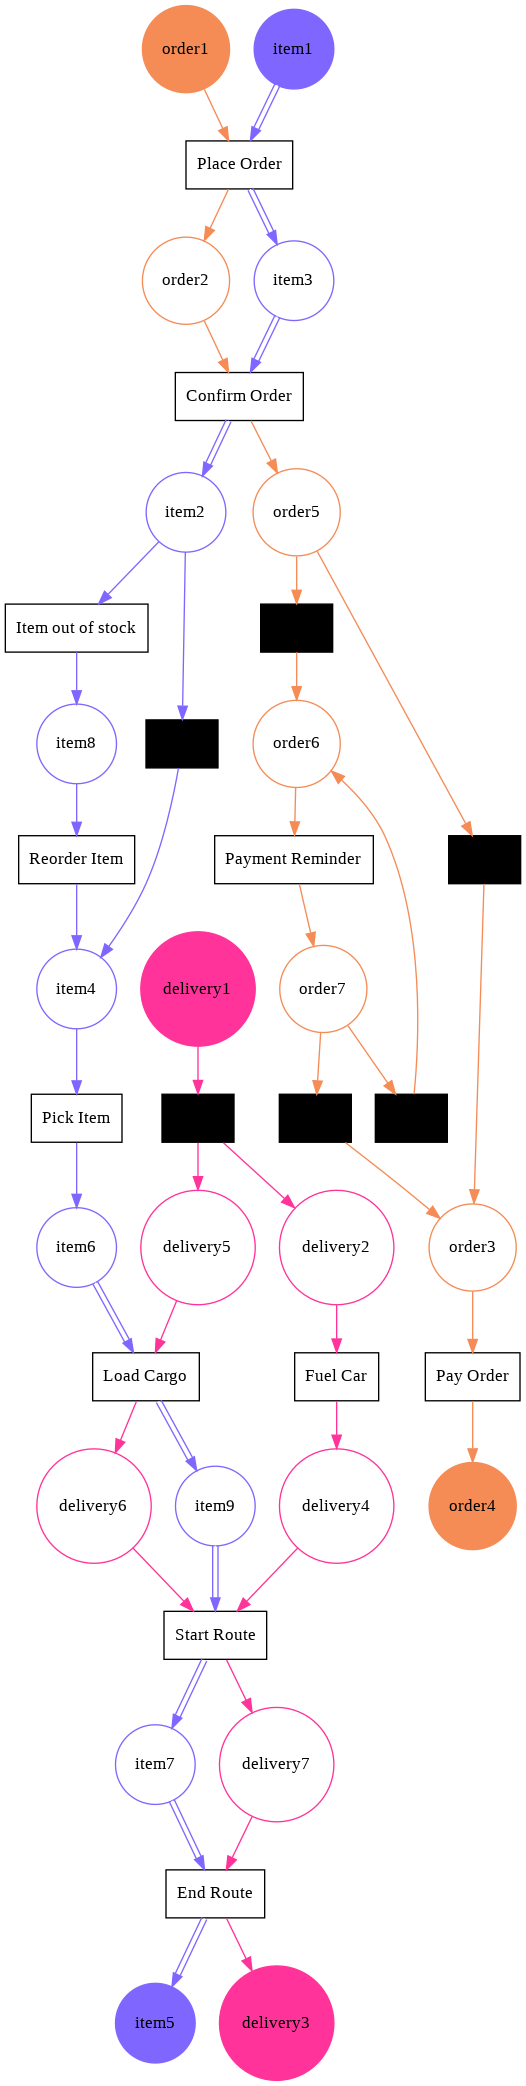

In [38]:
filename = "/content/order_process.jsonocel"
ocel_order_process = ocel_import_factory.apply(filename)
ocpn_order_process = ocpn_discovery_factory.apply(ocel_order_process)
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn_order_process), "oc_order_process_petri_net.png")
im_order_process = Image.open(r"oc_order_process_petri_net.png")
im_order_process

In [44]:
# Get object types from OCEL
object_types = list(ocel_order_process.object_types)  # Extract object types

# Calculate simplicity of the discovered Petri net
simplicity = calculate_ocel_simplicity(ocpn_order_process, object_types)
print(f"Overall Simplicity of the Petri Net: {simplicity:.4f}")

Overall Simplicity of the Petri Net: 0.6834
